In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
def correct_perspective(img):
    size=(img.shape[1],img.shape[0])
    pts=np.float32([[100,300],[500,300],
                    [10,480],[590,480]])
    dst=np.float32([[10,200],[590,200],
                    [10,480],[590,480]])
    mat=cv2.getPerspectiveTransform(pts,dst)
    tr_img=cv2.warpPerspective(img,mat,size)
    return tr_img

In [17]:
def revert_perspective(img):
    size=(img.shape[1],img.shape[0])
    pts=np.float32([[100,300],[500,300],
                    [10,480],[590,480]])
    dst=np.float32([[10,200],[590,200],
                    [10,480],[590,480]])
    mat=cv2.getPerspectiveTransform(dst,pts)
    tr_img=cv2.warpPerspective(img,mat,size)
    return tr_img

In [18]:
def revert_points(pt1,pt2):
    pts=np.float32([[100,300],[500,300],
                    [10,480],[590,480]])
    dst=np.float32([[10,200],[590,200],
                    [10,480],[590,480]])
    mat=cv2.getPerspectiveTransform(dst,pts)
    src=np.array([[pt1,pt2]],dtype=np.float32)
    points=cv2.perspectiveTransform(src,mat)
    return np.int64(points[0])

In [6]:
def find_lanes(mask):
    #find contours
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    #check number of contours
    if len(contours)==2:
        angs=[]
        pts=[]
        halfwidths=[]
        #record angles, centers, widths for every contour
        for cnt in contours :           
            blackbox=cv2.minAreaRect(cnt)  
            (x,y),(w,h),ang = blackbox   
            if w < h :
                ang = (ang+90)
                halfwidths.append(h/2)
            else:
                halfwidths.append(w/2)    
            pts.append((x,y))
            angs.append(ang)
        #find target line
        target1=(((pts[0][0]+pts[1][0])/2,(pts[0][1]+pts[1][1])/2))
        target0=((target1[0]-sum(halfwidths)/2*np.cos(sum(angs)/2*np.pi/180-np.pi),target1[1]+sum(halfwidths)/2*np.sin(sum(angs)/2*np.pi/180)))
        #find errors
        #ang_error=sum(ang)/2-90
        #dist_error=((target0[0]-np.shape(mask)[0]/2)**2+(target0[1]-np.shape(mask)[1])**2)**0.5
        return target1,target0
    elif len(contours)==1 :
        pass
    elif len(contours)>2 :
        pass
    else :
        pass

In [71]:
def threshold(img,color,) :
    img=cv2.blur(img,(3,3))
    kernel = np.ones((3, 3), np.uint8)
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    print(hsv[470,600])
    if color=="red":
        mask=cv2.inRange(hsv,np.array([110,50,165]),np.array([125,255,255]))
    elif color=="yellow" :
        mask=cv2.inRange(hsv,np.array([10,40,165]),np.array([35,255,255]))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask= cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1) 
    return mask

In [65]:
img=plt.imread("ezgif-frame-106.jpg")

In [49]:
yl=img[470,600]
print(yl)

[244 249  72]


In [83]:
yl=np.uint8([[[255, 255,  72]]])

In [84]:
cv2.cvtColor(yl,cv2.COLOR_RGB2HSV)

array([[[ 30, 183, 255]]], dtype=uint8)

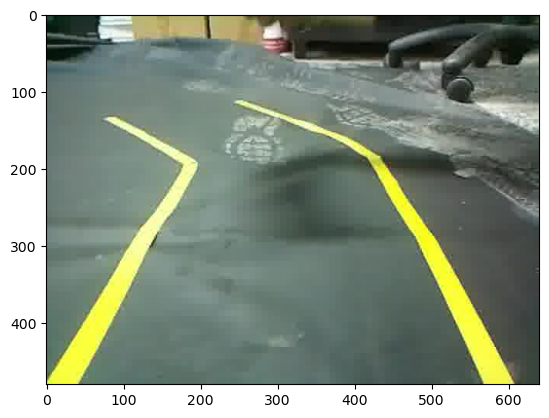

In [66]:
plt.imshow(img)

In [67]:
img=correct_perspective(img)

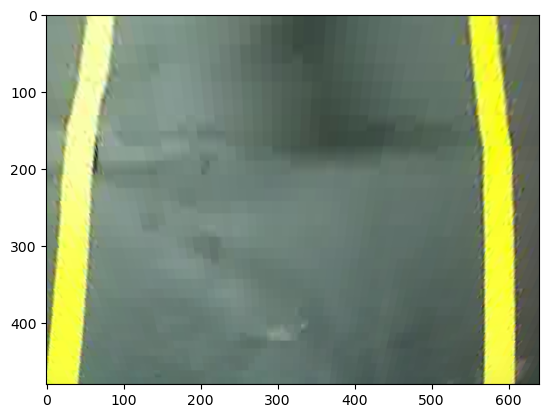

In [68]:
plt.imshow(img)

In [72]:
mask=threshold(img,"yellow")

[ 31 181 248]


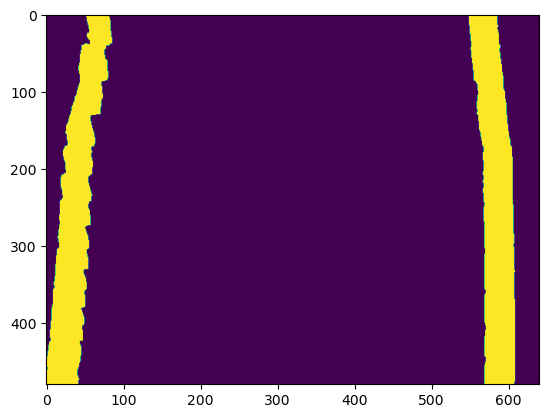

In [73]:
plt.imshow(mask)

In [74]:
pt1,pt2=find_lanes(mask)

In [75]:
pt1,pt2=revert_points(pt1,pt2)

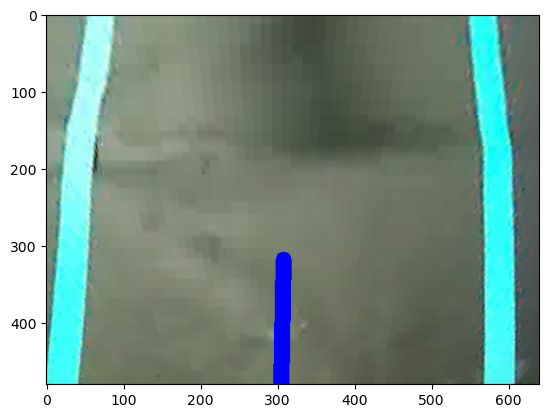

In [76]:
k=np.zeros(np.shape(mask))
cv2.line(img,pt1,pt2,(255),20)
show(img.astype("uint8"))

In [80]:
contours, hierarchy = cv2.findContours(mask,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [81]:
z=np.zeros(np.shape(mask))
angs=[]
pts=[]
halfwidths=[]
for cnt in contours :
    blackbox=cv2.minAreaRect(cnt) 
    (x,y),(w,h),ang = blackbox
    #if ang < -45: ang += 90
    if w < h :
        
        ang = (ang+90)
        print("!",ang)
        halfwidths.append(h/2)
    else:
        halfwidths.append(w/2)
    #if w > h and ang < 0: ang = 90 + ang
    pts.append((x,y))
    angs.append(ang)
    print(blackbox)
    box = cv2.boxPoints(blackbox)
    print(box)
    box = np.int64(box)
    cv2.drawContours(z, [box], -1, (255),10)
print(pts,halfwidths,angs)
target1=np.int64(((pts[0][0]+pts[1][0])/2,(pts[0][1]+pts[1][1])/2))
target0=np.int64((target1[0]-sum(halfwidths)/2*np.cos(sum(angs)/2*np.pi/180-np.pi),target1[1]+sum(halfwidths)/2*np.sin(sum(angs)/2*np.pi/180)))
cv2.line(z,target0,target1,(255),20)

((582.9171142578125, 239.2615203857422), (481.1314392089844, 48.896034240722656), 87.47917175292969)
[[ 5.4791205e+02  3.8757324e-03]
 [ 5.9676080e+02 -2.1466980e+00]
 [ 6.1792218e+02  4.7851917e+02]
 [ 5.6907343e+02  4.8066974e+02]]
! 95.61970901489258
((40.409080505371094, 239.54022216796875), (49.08559036254883, 484.5317687988281), 5.619709014892578)
[[ -7.7397003  478.23837   ]
 [ 39.70819     -3.9646385 ]
 [ 88.55786      0.84207153]
 [ 41.10997    483.04507   ]]
[(582.9171142578125, 239.2615203857422), (40.409080505371094, 239.54022216796875)] [240.5657196044922, 242.26588439941406] [87.47917175292969, 95.61970901489258]


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.]])

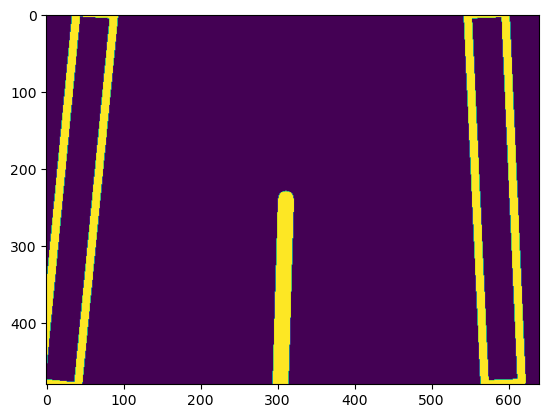

In [82]:
plt.imshow(z)

In [79]:
z=revert_perspective(z)

In [70]:
src=np.array([[target0,target1]],dtype=np.float32)
#src=np.array([src],dtype=np.float32)

In [78]:
target0

array([ 822, 1626], dtype=int64)

In [57]:
    pts=np.float32([[350,1250],[1300,1250],
                    [100,1500],[1490,1500]])
    dst=np.float32([[100,1000],[1490,1000],
                    [100,1500],[1490,1500]])
    mat=cv2.getPerspectiveTransform(dst,pts)

In [79]:
points=cv2.perspectiveTransform(src,mat)
points.astype("int64")

array([[[ 813, 1604],
        [ 815, 1193]]], dtype=int64)

In [80]:
points[0][0]

array([ 813.0446, 1604.3594], dtype=float32)

In [82]:
k=np.zeros(np.shape(mask))

pt1=np.array(tuple(points[0][0]),dtype=np.int64)
pt2=np.array(tuple(points[0][1]),dtype=np.int64)
cv2.line(k,pt1,pt2,(255),20)
    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

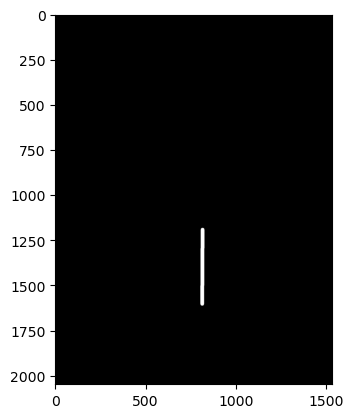

In [83]:
show(np.uint8(k))

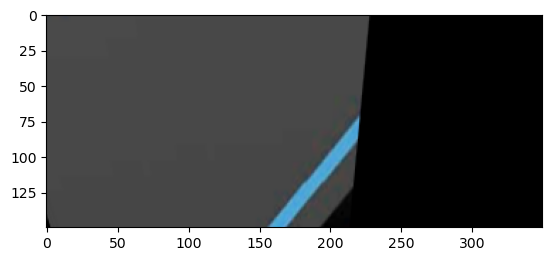

In [170]:
show(img)